# Activation function investigation


In [1]:
import numpy as np
import math

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

from timeit import default_timer as timer

### Plotting activation functions

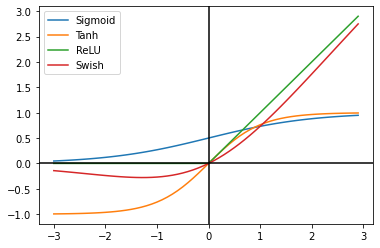

In [2]:
# Sigmoid Function
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a
# Hyperbolic Tanjant Function
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
# ReLU Function
def re(x):
    b = []
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b
# Leaky ReLU Function

# Determining the intervals to be created for the graph
x = np.arange(-3., 3., 0.1)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
swish = sig*x

# Displaying the functions
line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x,swish, label='Swish')
plt.legend(handles=[line_1, line_2, line_3, line_4])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### Loading data

In [3]:
# load numpy array from npy file
from numpy import load
# load array
x_train = load('./x_train_sample.npy')
# print the array
print(x_train[:5])

[[[[165. 159. 178.]
   [168. 162. 181.]
   [173. 167. 186.]
   ...
   [170. 164. 183.]
   [183. 177. 196.]
   [170. 164. 183.]]

  [[177. 171. 190.]
   [173. 167. 186.]
   [177. 171. 190.]
   ...
   [200. 194. 213.]
   [182. 176. 195.]
   [203. 197. 216.]]

  [[175. 169. 188.]
   [168. 162. 181.]
   [178. 172. 191.]
   ...
   [192. 183. 203.]
   [192. 186. 205.]
   [184. 178. 197.]]

  ...

  [[134. 129. 150.]
   [143. 138. 159.]
   [136. 131. 152.]
   ...
   [199. 194. 215.]
   [170. 164. 183.]
   [181. 175. 194.]]

  [[131. 129. 149.]
   [135. 133. 153.]
   [144. 142. 162.]
   ...
   [152. 148. 167.]
   [161. 155. 174.]
   [161. 155. 174.]]

  [[134. 132. 152.]
   [131. 129. 149.]
   [131. 129. 149.]
   ...
   [144. 140. 159.]
   [144. 138. 157.]
   [171. 165. 184.]]]


 [[[115. 114. 118.]
   [112. 111. 115.]
   [119. 118. 120.]
   ...
   [135. 134. 138.]
   [134. 130. 135.]
   [138. 134. 139.]]

  [[115. 114. 118.]
   [116. 115. 119.]
   [118. 117. 119.]
   ...
   [134. 133. 137.]
 

In [4]:
x_test = load('./x_test_sample.npy')
y_train = load('./y_train_sample.npy')
y_test = load('./y_test_sample.npy')

### Fitting models

In [5]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

from timeit import default_timer as timer


In [6]:
batch_size = 128 # Batch-Size
num_classes = 15 # Number of Class
epochs = 20 # Number of epoch
w_l2 = 1e-5 # Initial

In [7]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [8]:
input_shape = (32, 32, 3)

In [9]:
#Sigmoid

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0

In [10]:
start = timer()
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
end = timer()

score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_sigmoid = end - start 
print('Time to run', time_sigmoid, ' seconds')

Epoch 1/20
15/15 [==============================] - 10s 496ms/step - loss: 2.5065 - accuracy: 0.2156 - val_loss: 4.2814 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 7s 444ms/step - loss: 1.9966 - accuracy: 0.3672 - val_loss: 4.7335 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - 7s 446ms/step - loss: 1.8951 - accuracy: 0.4144 - val_loss: 4.7453 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - 7s 435ms/step - loss: 1.7916 - accuracy: 0.4622 - val_loss: 4.4142 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - 7s 449ms/step - loss: 1.7278 - accuracy: 0.4756 - val_loss: 4.0761 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - 7s 440ms/step - loss: 1.6672 - accuracy: 0.5050 - val_loss: 4.0952 - val_accuracy: 0.0644 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - 7s 440ms/step - l

In [11]:
# Hyperbolic tangent 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 28, 28, 64)       

In [12]:
start = timer()

hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])

end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_tanh = end - start 
print('Time to run', time_tanh, ' seconds')

Epoch 1/20
15/15 [==============================] - 9s 437ms/step - loss: 2.1190 - accuracy: 0.3650 - val_loss: 3.3013 - val_accuracy: 0.1933 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 6s 422ms/step - loss: 1.2230 - accuracy: 0.6117 - val_loss: 2.8594 - val_accuracy: 0.3111 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - 6s 418ms/step - loss: 0.9724 - accuracy: 0.7033 - val_loss: 3.0544 - val_accuracy: 0.2689 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - 7s 496ms/step - loss: 0.8124 - accuracy: 0.7561 - val_loss: 2.8732 - val_accuracy: 0.2822 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - 7s 493ms/step - loss: 0.6458 - accuracy: 0.8183 - val_loss: 2.1867 - val_accuracy: 0.4467 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - 8s 505ms/step - loss: 0.5202 - accuracy: 0.8633 - val_loss: 2.0493 - val_accuracy: 0.4400 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - 10s 673ms/step - l

In [13]:
# Relu

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 28, 28, 64)       

In [14]:
start = timer()

hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_relu = end - start 
print('Time to run', time_relu, ' seconds')

Epoch 1/20
15/15 [==============================] - 11s 502ms/step - loss: 2.2718 - accuracy: 0.3278 - val_loss: 21.9914 - val_accuracy: 0.1133 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 7s 493ms/step - loss: 1.2762 - accuracy: 0.6011 - val_loss: 14.1461 - val_accuracy: 0.0911 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - 7s 465ms/step - loss: 1.0522 - accuracy: 0.6839 - val_loss: 6.2264 - val_accuracy: 0.1467 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - 8s 511ms/step - loss: 0.8288 - accuracy: 0.7683 - val_loss: 5.6816 - val_accuracy: 0.1511 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - 8s 494ms/step - loss: 0.6803 - accuracy: 0.8256 - val_loss: 3.6491 - val_accuracy: 0.2556 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - 7s 491ms/step - loss: 0.5541 - accuracy: 0.8700 - val_loss: 2.3831 - val_accuracy: 0.4156 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - 8s 519ms/step -

In [15]:
# Swish 

def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 28, 28, 64)       

In [17]:
start = timer()

hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])

end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_swish = end - start 
print('Time to run', time_swish, ' seconds')

Epoch 1/20
15/15 [==============================] - 244s 17s/step - loss: 2.0134 - accuracy: 0.3722 - val_loss: 43.8369 - val_accuracy: 0.1089 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - 16s 1s/step - loss: 1.1531 - accuracy: 0.6522 - val_loss: 20.2673 - val_accuracy: 0.0711 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - 19s 668ms/step - loss: 0.8638 - accuracy: 0.7744 - val_loss: 10.7274 - val_accuracy: 0.1911 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - 9s 585ms/step - loss: 0.6887 - accuracy: 0.8194 - val_loss: 4.6223 - val_accuracy: 0.2978 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - 8s 535ms/step - loss: 0.5340 - accuracy: 0.8844 - val_loss: 4.0371 - val_accuracy: 0.2956 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - 10s 676ms/step - loss: 0.4496 - accuracy: 0.9072 - val_loss: 2.7267 - val_accuracy: 0.3689 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - 9s 574ms/step -

### Results

In [18]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(title[attribute])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Swish'], loc=loc)  

    plt.show()

In [19]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_swish]

In [20]:
history_dict = hist_sigmoid.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


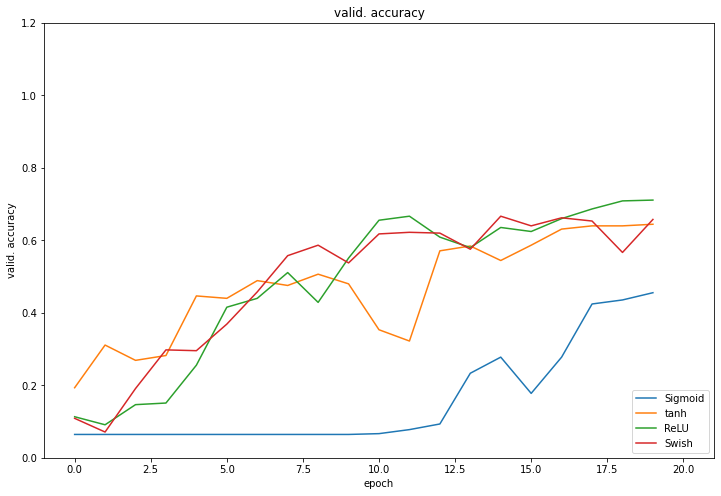

In [21]:
# Validation accuracy
plot_history(hists, attribute='val_accuracy',axis=(-1,21,0.0,1.2), loc='lower right')

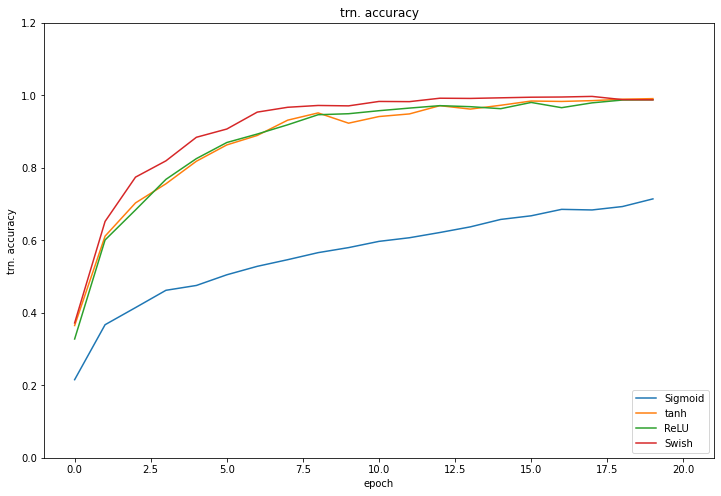

In [22]:
# train accuracy
plot_history(hists, attribute='accuracy', axis=(-1,21,0.0,1.2), loc='lower right')

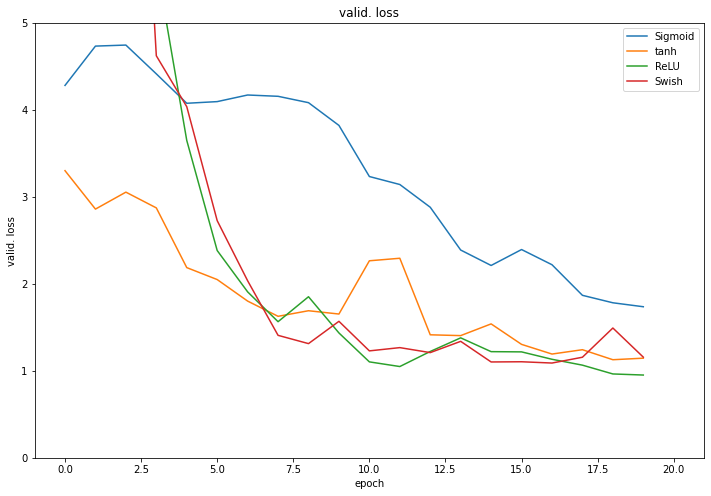

In [23]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.0,5), loc='upper right')

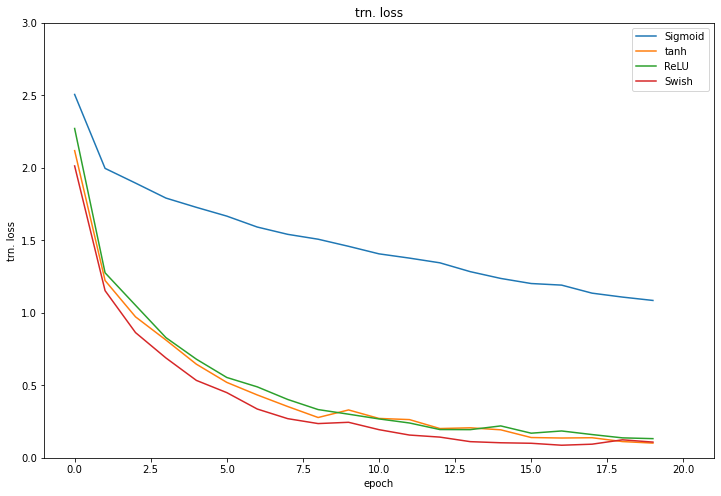

In [24]:
plot_history(hists, attribute='loss', axis=(-1,21,0.00,3), loc='upper right')

In [25]:
times = [time_sigmoid, time_tanh, time_relu, time_swish]

In [26]:
final_val_accuracy = []

for i in range(4):
    final_val_accuracy.append(hists[i].history['val_accuracy'][19])
    
print(final_val_accuracy)

[0.4555555582046509, 0.644444465637207, 0.7111111283302307, 0.6577777862548828]


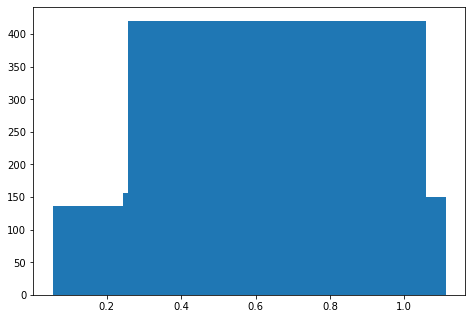

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(final_val_accuracy,times)
plt.show()

Text(0, 0.5, 'Validation accuracy')

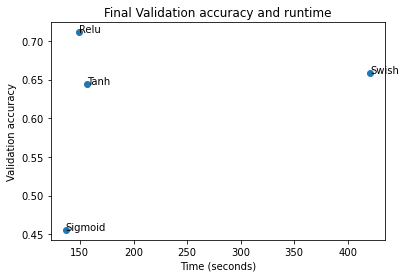

In [28]:

n = ['Sigmoid', 'Tanh', 'Relu', 'Swish']

fig, ax = plt.subplots()
ax.scatter(times, final_val_accuracy)

for i, txt in enumerate(n):
    ax.annotate(txt, (times[i], final_val_accuracy[i]))
    
plt.title("Final Validation accuracy and runtime")
plt.xlabel("Time (seconds)")
plt.ylabel("Validation accuracy")

### References 

1. https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a